In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urlencode,quote
import urllib.request
import json

In [3]:
#그래프 패키지 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [4]:
# 한글 문제 해결
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [5]:
# 동시 출력
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

## 백신 데이터 정리

In [207]:
seoul_vc = pd.read_csv('data/vc_seoul.csv').iloc[:112,3:]
busan_vc = pd.read_csv('data/vc_busan.csv').iloc[:112,3:]
daegu_vc = pd.read_csv('data/vc_daegu.csv').iloc[:112,3:]

In [208]:
#날짜변경
date_lis = []
for date in seoul_vc['baseDate']:
    date_lis.append(int(date[:10].replace("-","")))

    
seoul_vc['baseDate'] = date_lis
busan_vc['baseDate'] = date_lis

In [223]:
# 지역별 주간 누적 (영화 기준 인덱스 수정)
## 서울
tmp_s = seoul_vc[
         (seoul_vc['baseDate']==20210318) | 
         (seoul_vc['baseDate']==20210325) |
         (seoul_vc['baseDate']==20210401) |
         (seoul_vc['baseDate']==20210408) | 
         (seoul_vc['baseDate']==20210415) |
         (seoul_vc['baseDate']==20210422) | 
         (seoul_vc['baseDate']==20210429) |
         (seoul_vc['baseDate']==20210506) |
         (seoul_vc['baseDate']==20210513) | 
         (seoul_vc['baseDate']==20210520) |
         (seoul_vc['baseDate']==20210527) |
         (seoul_vc['baseDate']==20210603) |
         (seoul_vc['baseDate']==20210610) |
         (seoul_vc['baseDate']==20210617) | 
         (seoul_vc['baseDate']==20210624) |
         (seoul_vc['baseDate']==20210630) 
        ]

## 부산
tmp_b = busan_vc[
         (busan_vc['baseDate']==20210318) | 
         (busan_vc['baseDate']==20210314) |
         (busan_vc['baseDate']==20210401) |
         (busan_vc['baseDate']==20210408) | 
         (busan_vc['baseDate']==20210415) |
         (busan_vc['baseDate']==20210422) | 
         (busan_vc['baseDate']==20210429) |
         (busan_vc['baseDate']==20210506) |
         (busan_vc['baseDate']==20210513) | 
         (busan_vc['baseDate']==20210520) |
         (busan_vc['baseDate']==20210527) |
         (busan_vc['baseDate']==20210603) |
         (busan_vc['baseDate']==20210610) |
         (busan_vc['baseDate']==20210617) | 
         (busan_vc['baseDate']==20210624) |
         (busan_vc['baseDate']==20210630)  
        ]


In [224]:
## 불필요한 열 제거
tmp_s = tmp_s.reset_index(drop=True)
tmp_b = tmp_b.reset_index(drop=True)

In [225]:
#주간 접종자 수 계산
s_week_1 = [0]
b_week_1 = [0]
s_week_2 = [0]
b_week_2 = [0]

for i in range(16):
    try:
        s_week_2.append(tmp_s['totalSecondCnt'][i+1]-tmp_s['totalSecondCnt'][i])
        b_week_2.append(tmp_b['totalSecondCnt'][i+1]-tmp_b['totalSecondCnt'][i])
        
        s_week_1.append(tmp_s['totalFirstCnt'][i+1]-tmp_s['totalFirstCnt'][i])
        b_week_1.append(tmp_b['totalFirstCnt'][i+1]-tmp_b['totalFirstCnt'][i])
        
    except:
        pass

In [227]:

#지역별 주간 누적 dict: 날짜,1차누계,2차
dict_seoul_vaccine = {"일자":tmp_s['baseDate'].astype(str).values,
             "1차접종누계":tmp_s['totalFirstCnt'].values,
             "2차접종누계":tmp_s['totalSecondCnt'].values,
             "주간1차접종자수": np.array(s_week_1),
             "주간2차접종자수": np.array(s_week_2)
            }

dict_busan_vaccine = {"일자":tmp_b['baseDate'].astype(str).values,
             "1차접종누계":tmp_b['totalFirstCnt'].values,
             "2차접종누계":tmp_b['totalSecondCnt'].values,
             "주간1차접종자수": np.array(b_week_1),
             "주간2차접종자수": np.array(b_week_2)
               }

In [228]:
dict_seoul_vaccine
dict_busan_vaccine

{'일자': array(['20210318', '20210325', '20210401', '20210408', '20210415',
        '20210422', '20210429', '20210506', '20210513', '20210520',
        '20210527', '20210603', '20210610', '20210617', '20210624',
        '20210630'], dtype=object),
 '1차접종누계': array([ 109536,  122249,  141584,  166563,  195071,  294555,  438269,
         563044,  600548,  616705,  650432, 1165736, 1746392, 2554809,
        2802006, 2833050], dtype=int64),
 '2차접종누계': array([     0,   1725,   6227,  12397,  13502,  13543,  27699,  47940,
        112781, 175445, 291118, 346936, 380200, 685532, 813666, 914519],
       dtype=int64),
 '주간1차접종자수': array([     0,  12713,  19335,  24979,  28508,  99484, 143714, 124775,
         37504,  16157,  33727, 515304, 580656, 808417, 247197,  31044],
       dtype=int64),
 '주간2차접종자수': array([     0,   1725,   4502,   6170,   1105,     41,  14156,  20241,
         64841,  62664, 115673,  55818,  33264, 305332, 128134, 100853],
       dtype=int64)}

{'일자': array(['20210314', '20210318', '20210401', '20210408', '20210415',
        '20210422', '20210429', '20210506', '20210513', '20210520',
        '20210527', '20210603', '20210610', '20210617', '20210624',
        '20210630'], dtype=object),
 '1차접종누계': array([  45868,   50988,   73571,   83895,   96082,  121702,  174943,
         223997,  231495,  233540,  254350,  470503,  713446,  996171,
        1089840, 1100426], dtype=int64),
 '2차접종누계': array([     0,      0,    245,   2388,   4161,   4161,   8592,  18249,
         32353,  60033, 118935, 132160, 141696, 230090, 285163, 326829],
       dtype=int64),
 '주간1차접종자수': array([     0,   5120,  22583,  10324,  12187,  25620,  53241,  49054,
          7498,   2045,  20810, 216153, 242943, 282725,  93669,  10586],
       dtype=int64),
 '주간2차접종자수': array([    0,     0,   245,  2143,  1773,     0,  4431,  9657, 14104,
        27680, 58902, 13225,  9536, 88394, 55073, 41666], dtype=int64)}

In [229]:
seoul_vaccine = pd.DataFrame(dict_seoul_vaccine)
busan_vaccine = pd.DataFrame(dict_busan_vaccine)

In [230]:
seoul_vaccine

,일자,1차접종누계,2차접종누계,주간1차접종자수,주간2차접종자수
0,20210318,109536,0,0,0
1,20210325,122249,1725,12713,1725
2,20210401,141584,6227,19335,4502
3,20210408,166563,12397,24979,6170
4,20210415,195071,13502,28508,1105
5,20210422,294555,13543,99484,41
6,20210429,438269,27699,143714,14156
7,20210506,563044,47940,124775,20241
8,20210513,600548,112781,37504,64841
9,20210520,616705,175445,16157,62664


## 영화관 자료 정리

In [231]:
seuoul_test_data_2020 = pd.read_csv("./data/seoul_movie_2020.csv", thousands=',', encoding='UTF-8')
busan_test_data_2020 = pd.read_csv("./data/busan_movie_2020.csv", thousands=',', encoding='UTF-8')
avg_movie = pd.read_csv("./data/2019_평균자료_영화.csv", thousands=',', encoding='UTF-8')

In [232]:
seuoul_test_data_2020.head()
busan_test_data_2020.head()
avg_movie.head()

,Unnamed: 0,지역,매출액,관객수,주
0,5,서울시,3361656490,368804,2020-08-16
1,5,서울시,2189550260,247399,2020-08-23
2,5,서울시,1842116650,200100,2020-08-30
3,5,서울시,1733144880,188395,2020-09-06
4,5,서울시,1571785690,172993,2020-09-13


,Unnamed: 0,지역,매출액,관객수,주
0,7,부산시,1114537230,123943,2020-08-16
1,7,부산시,618924290,71890,2020-08-23
2,7,부산시,467448880,53630,2020-08-30
3,7,부산시,401747560,45878,2020-09-06
4,7,부산시,350543860,40374,2020-09-13


,Unnamed: 0,상영편수,매출액,관객수
0,서울,62.076923,9.735130e+09,1.111436e+06
1,부산,27.519231,2.929068e+09,3.491882e+05


In [233]:
seuoul_test_data_2021_bv = pd.read_csv("./data/2021_~02서울.csv", thousands=',', encoding='UTF-8')
seuoul_test_data_2021_av = pd.read_csv("./data/2021_03~06서울.csv", thousands=',', encoding='UTF-8')
busan_test_data_2021_bv = pd.read_csv("./data/2021_~02부산.csv", thousands=',', encoding='UTF-8')
busan_test_data_2021_av = pd.read_csv("./data/2021_03~06부산.csv", thousands=',', encoding='UTF-8')

In [234]:
seuoul_test_data_2021_bv.head()
seuoul_test_data_2021_av.head()

,Unnamed: 0,지역,매출액,관객수,주
0,5,서울시,625176800,71052,2021-01-01
1,5,서울시,446257140,50249,2021-01-08
2,5,서울시,761371720,85940,2021-01-15
3,5,서울시,2050589220,230553,2021-01-22
4,5,서울시,2287327000,246303,2021-01-29


,Unnamed: 0,지역,매출액,관객수,주
0,5,서울시,2370034110,245237,2021-03-12
1,5,서울시,2370034110,245237,2021-03-12
2,5,서울시,2089378170,221908,2021-03-19
3,5,서울시,2156717370,223590,2021-03-26
4,5,서울시,2394668990,261118,2021-04-02


In [235]:
## 중복된 0312 데이터 삭제
seuoul_test_data_2021_av.drop([0], inplace=True)

In [236]:
movie_seoul_2021 = seuoul_test_data_2021_bv.sort_values(by=['주', '매출액'])

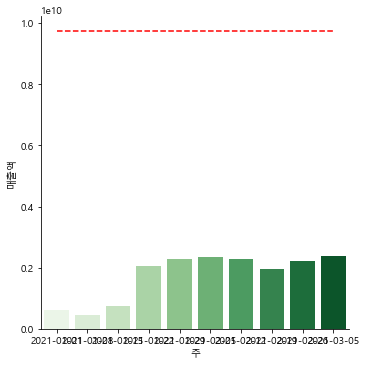

In [237]:
sns.catplot(data = movie_seoul_2021, x='주', y='매출액', kind = 'bar', palette = 'Greens')
plt.axhline(avg_movie['매출액'][0],0.05, 0.95, color = 'red', linestyle = '--' )

In [238]:
movie_seoul_2021 = seuoul_test_data_2021_av.sort_values(by=['주', '매출액'])

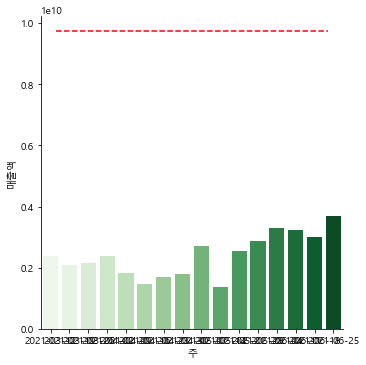

In [239]:
sns.catplot(data = movie_seoul_2021, x='주', y='매출액', kind = 'bar', palette = 'Greens')
plt.axhline(avg_movie['매출액'][0],0.05, 0.95, color = 'red', linestyle = '--' )

## 서울시 시각화 파일 합치기

In [240]:
seuoul_test_data_2020
seuoul_test_data_2021_bv
seuoul_test_data_2021_av

,Unnamed: 0,지역,매출액,관객수,주
0,5,서울시,3361656490,368804,2020-08-16
1,5,서울시,2189550260,247399,2020-08-23
2,5,서울시,1842116650,200100,2020-08-30
3,5,서울시,1733144880,188395,2020-09-06
4,5,서울시,1571785690,172993,2020-09-13
5,5,서울시,1686750342,194747,2020-09-20
6,6,서울시,4365204790,464557,2020-09-27
7,5,서울시,2310220710,243950,2020-10-04
8,5,서울시,1635498260,175172,2020-10-11
9,5,서울시,2051049940,235614,2020-10-18


,Unnamed: 0,지역,매출액,관객수,주
0,5,서울시,625176800,71052,2021-01-01
1,5,서울시,446257140,50249,2021-01-08
2,5,서울시,761371720,85940,2021-01-15
3,5,서울시,2050589220,230553,2021-01-22
4,5,서울시,2287327000,246303,2021-01-29
5,5,서울시,2358611200,247998,2021-02-05
6,5,서울시,2299673230,241331,2021-02-12
7,5,서울시,1955377880,215607,2021-02-19
8,5,서울시,2226500250,242385,2021-02-26
9,5,서울시,2370034110,245237,2021-03-05


,Unnamed: 0,지역,매출액,관객수,주
1,5,서울시,2370034110,245237,2021-03-12
2,5,서울시,2089378170,221908,2021-03-19
3,5,서울시,2156717370,223590,2021-03-26
4,5,서울시,2394668990,261118,2021-04-02
5,5,서울시,1826626560,193633,2021-04-09
6,5,서울시,1481982720,158687,2021-04-16
7,5,서울시,1709790330,183278,2021-04-23
8,5,서울시,1796128240,207101,2021-04-30
9,5,서울시,2713673630,290264,2021-05-07
10,5,서울시,1365881880,148365,2021-05-14


In [241]:
## 불필요한 열제거
seuoul_test_data_2020.drop('Unnamed: 0',axis=1, inplace=True)
seuoul_test_data_2021_bv.drop('Unnamed: 0',axis=1, inplace=True)
seuoul_test_data_2021_av.drop('Unnamed: 0',axis=1, inplace=True)

In [242]:
seuoul_test_data_2020.head()
seuoul_test_data_2021_bv.head()
seuoul_test_data_2021_av.head()

,지역,매출액,관객수,주
0,서울시,3361656490,368804,2020-08-16
1,서울시,2189550260,247399,2020-08-23
2,서울시,1842116650,200100,2020-08-30
3,서울시,1733144880,188395,2020-09-06
4,서울시,1571785690,172993,2020-09-13


,지역,매출액,관객수,주
0,서울시,625176800,71052,2021-01-01
1,서울시,446257140,50249,2021-01-08
2,서울시,761371720,85940,2021-01-15
3,서울시,2050589220,230553,2021-01-22
4,서울시,2287327000,246303,2021-01-29


,지역,매출액,관객수,주
1,서울시,2370034110,245237,2021-03-12
2,서울시,2089378170,221908,2021-03-19
3,서울시,2156717370,223590,2021-03-26
4,서울시,2394668990,261118,2021-04-02
5,서울시,1826626560,193633,2021-04-09


In [243]:
tot_seoul_data = pd.concat([seuoul_test_data_2020, seuoul_test_data_2021_bv, seuoul_test_data_2021_av])

## 인덱스 리셋 시켜서 그래프 그리기

In [244]:
seuoul_test_data_2021_av.reset_index(drop=True, inplace=True)

In [245]:
## seoul_vaccine에 주 컬럼 추가

seoul_vaccine['주'] = seuoul_test_data_2021_av['주']

In [246]:
test =pd.DataFrame()

In [247]:
test['주'] = tot_seoul_data['주']

In [248]:
test.reset_index(drop=True, inplace=True)

In [249]:
seoul_vaccine

,일자,1차접종누계,2차접종누계,주간1차접종자수,주간2차접종자수,주
0,20210318,109536,0,0,0,2021-03-12
1,20210325,122249,1725,12713,1725,2021-03-19
2,20210401,141584,6227,19335,4502,2021-03-26
3,20210408,166563,12397,24979,6170,2021-04-02
4,20210415,195071,13502,28508,1105,2021-04-09
5,20210422,294555,13543,99484,41,2021-04-16
6,20210429,438269,27699,143714,14156,2021-04-23
7,20210506,563044,47940,124775,20241,2021-04-30
8,20210513,600548,112781,37504,64841,2021-05-07
9,20210520,616705,175445,16157,62664,2021-05-14


In [250]:
seoul_vaccine.drop(['일자', '주간1차접종자수','주간2차접종자수'],axis=1, inplace=True)

In [251]:
seoul_vaccine=seoul_vaccine[['1차접종누계','2차접종누계','주']]

In [252]:
tot_seoul_data.reset_index(drop=True, inplace=True)

In [253]:
seoul_vaccine

,1차접종누계,2차접종누계,주
0,109536,0,2021-03-12
1,122249,1725,2021-03-19
2,141584,6227,2021-03-26
3,166563,12397,2021-04-02
4,195071,13502,2021-04-09
5,294555,13543,2021-04-16
6,438269,27699,2021-04-23
7,563044,47940,2021-04-30
8,600548,112781,2021-05-07
9,616705,175445,2021-05-14


In [254]:
tot_seoul_data

,지역,매출액,관객수,주
0,서울시,3361656490,368804,2020-08-16
1,서울시,2189550260,247399,2020-08-23
2,서울시,1842116650,200100,2020-08-30
3,서울시,1733144880,188395,2020-09-06
4,서울시,1571785690,172993,2020-09-13
5,서울시,1686750342,194747,2020-09-20
6,서울시,4365204790,464557,2020-09-27
7,서울시,2310220710,243950,2020-10-04
8,서울시,1635498260,175172,2020-10-11
9,서울시,2051049940,235614,2020-10-18


In [255]:
final_data = pd.merge(tot_seoul_data, seoul_vaccine, how='left')

In [262]:
final_data.to_csv('./result/finaly_data_서울시.csv')

In [200]:
## NaN 값 처리
final_data = final_data.fillna(0)

In [257]:
final_data.tail() 

,지역,매출액,관객수,주,1차접종누계,2차접종누계
41,서울시,2886481360,310014,2021-05-28,1165736.0,346936.0
42,서울시,3308331430,345848,2021-06-04,1746392.0,380200.0
43,서울시,3216698320,327510,2021-06-11,2554809.0,685532.0
44,서울시,3014873260,312236,2021-06-18,2802006.0,813666.0
45,서울시,3675390440,377430,2021-06-25,2833050.0,914519.0


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, 

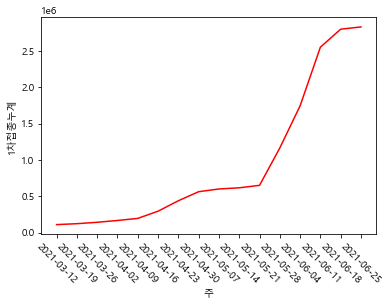

In [258]:
fig = sns.lineplot(data = final_data, x='주', y='1차접종누계', color ='red')
#fig.fig.set_size_inches(15,10)
#plt.axhline(avg_movie['매출액'][0],0.05, 0.95, color = 'red', linestyle = '--' )
plt.xticks(rotation = - 45 )

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 [Text(0, 0, '2020-08-16'),
  Text(1, 0, '2020-08-23'),
  Text(2, 0, '2020-08-30'),
  Text(3, 0, '2020-09-06'),
  Text(4, 0, '2020-09-13'),
  Text(5, 0, '2020-09-20'),
  Text(6, 0, '2020-09-27'),
  Text(7, 0, '2020-10-04'),
  Text(8, 0, '2020-10-11'),
  Text(9, 0, '2020-10-18'),
  Text(10, 0, '2020-10-25'),
  Text(11, 0, '2020-11-01'),
  Text(12, 0, '2020-11-08'),
  Text(13, 0, '2020-11-15'),
  Text(14, 0, '2020-11-22'),
  Text(15, 0, '2020-11-29'),
  Text(16, 0, '2020-12-06'),
  Text(17, 0, '2020-12-13'),
  Text(18, 0, '2020-12-20'),
  Text(19, 0, '2020-12-27'),
  Text(20, 0, '2021-01-01'),
  Text(21, 0, '2021-01-08'),
  Text(22, 0, '2021-01-15'),
  Text(23, 0, '2021-01-22'),
  Text(24, 0, '2021-01-29'),
  Text(25, 0, '2021-02-05'),
  Text(26, 0, '2021-02-12'),
  Text(27, 0, '20

<Figure size 1080x576 with 0 Axes>

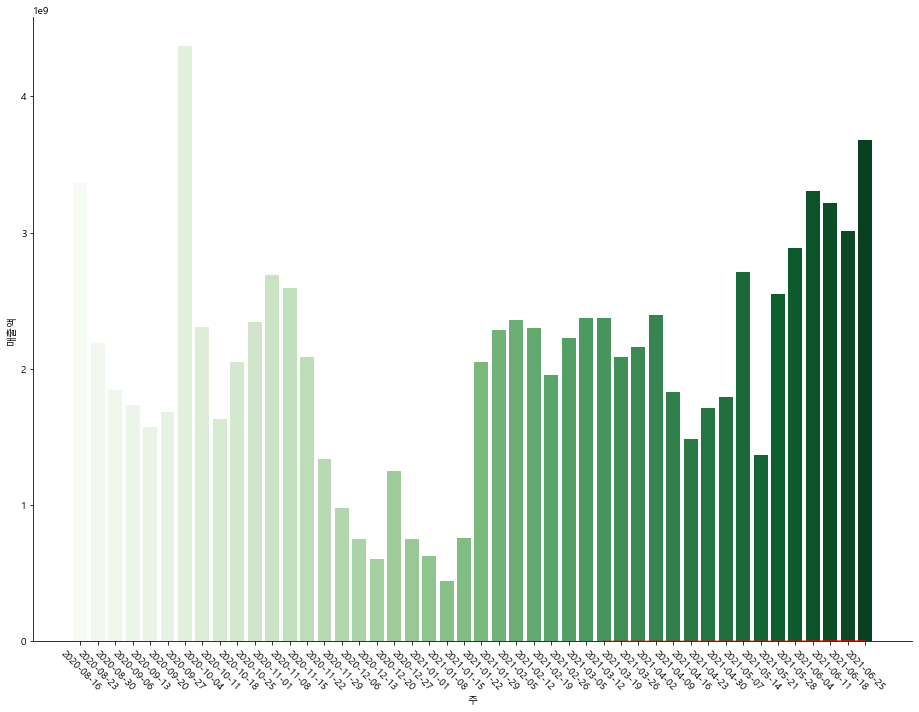

In [259]:
plt.gcf().set_size_inches(15, 8)

fig = sns.catplot(data = final_data, x='주', y='매출액', kind = 'bar', palette = 'Greens')
fig2 = sns.lineplot(data = final_data, x='주', y='1차접종누계', color ='red')

fig.fig.set_size_inches(15,10)
#plt.axhline(avg_movie['매출액'][0],0.05, 0.95, color = 'red', linestyle = '--' )
plt.xticks(rotation = - 45 )
#sns.barplot(x="주", y="매출액", data=tot_data)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]),
 [Text(0, 0, '2020-08-16'),
  Text(1, 0, '2020-08-23'),
  Text(2, 0, '2020-08-30'),
  Text(3, 0, '2020-09-06'),
  Text(4, 0, '2020-09-13'),
  Text(5, 0, '2020-09-20'),
  Text(6, 0, '2020-09-27'),
  Text(7, 0, '2020-10-04'),
  Text(8, 0, '2020-10-11'),
  Text(9, 0, '2020-10-18'),
  Text(10, 0, '2020-10-25'),
  Text(11, 0, '2020-11-01'),
  Text(12, 0, '2020-11-08'),
  Text(13, 0, '2020-11-15'),
  Text(14, 0, '2020-11-22'),
  Text(15, 0, '2020-11-29'),
  Text(16, 0, '2020-12-06'),
  Text(17, 0, '2020-12-13'),
  Text(18, 0, '2020-12-20'),
  Text(19, 0, '2020-12-27'),
  Text(20, 0, '2021-01-01'),
  Text(21, 0, '2021-01-08'),
  Text(22, 0, '2021-01-15'),
  Text(23, 0, '2021-01-22'),
  Text(24, 0, '2021-01-29'),
  Text(25, 0, '2021-02-05'),
  Text(26, 0, '2021-02-12'),
  Text(27, 0, '20

<Figure size 1080x576 with 0 Axes>

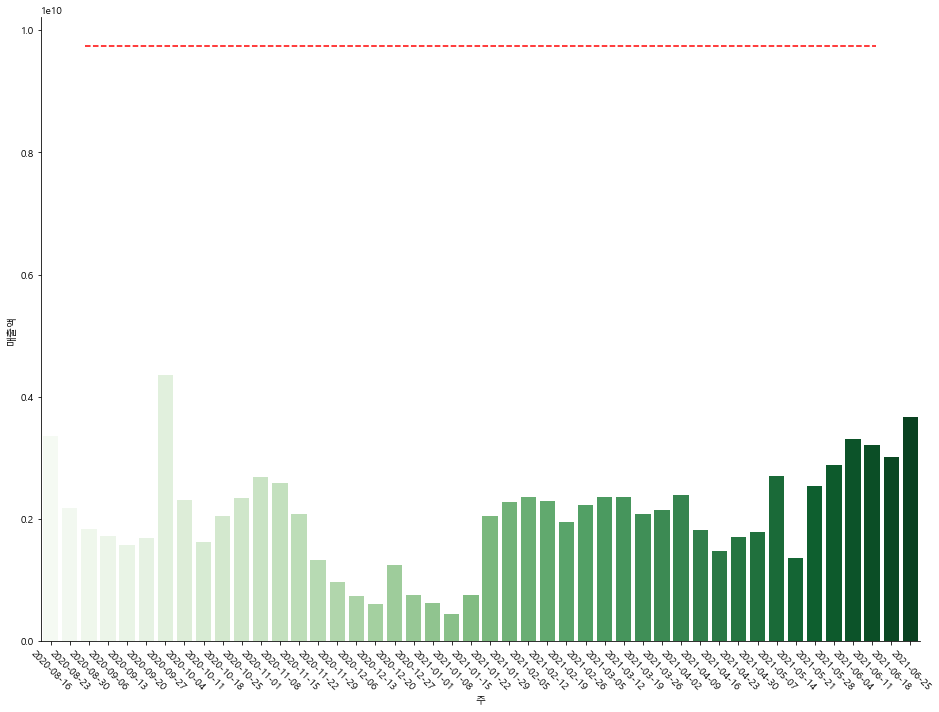

In [260]:
plt.gcf().set_size_inches(15, 8)

fig = sns.catplot(data = tot_seoul_data, x='주', y='매출액', kind = 'bar', palette = 'Greens')

fig.fig.set_size_inches(15,10)
plt.axhline(avg_movie['매출액'][0],0.05, 0.95, color = 'red', linestyle = '--' )
plt.xticks(rotation = - 45 )
#sns.barplot(x="주", y="매출액", data=tot_data)

<ipython-input-261-017a5bb70d85>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig1.set_xticklabels(fig1.get_xticklabels(), rotation=-55, fontsize='small')


[Text(0, 0, '2020-08-16'),
 Text(1, 0, '2020-08-23'),
 Text(2, 0, '2020-08-30'),
 Text(3, 0, '2020-09-06'),
 Text(4, 0, '2020-09-13'),
 Text(5, 0, '2020-09-20'),
 Text(6, 0, '2020-09-27'),
 Text(7, 0, '2020-10-04'),
 Text(8, 0, '2020-10-11'),
 Text(9, 0, '2020-10-18'),
 Text(10, 0, '2020-10-25'),
 Text(11, 0, '2020-11-01'),
 Text(12, 0, '2020-11-08'),
 Text(13, 0, '2020-11-15'),
 Text(14, 0, '2020-11-22'),
 Text(15, 0, '2020-11-29'),
 Text(16, 0, '2020-12-06'),
 Text(17, 0, '2020-12-13'),
 Text(18, 0, '2020-12-20'),
 Text(19, 0, '2020-12-27'),
 Text(20, 0, '2021-01-01'),
 Text(21, 0, '2021-01-08'),
 Text(22, 0, '2021-01-15'),
 Text(23, 0, '2021-01-22'),
 Text(24, 0, '2021-01-29'),
 Text(25, 0, '2021-02-05'),
 Text(26, 0, '2021-02-12'),
 Text(27, 0, '2021-02-19'),
 Text(28, 0, '2021-02-26'),
 Text(29, 0, '2021-03-05'),
 Text(30, 0, '2021-03-12'),
 Text(31, 0, '2021-03-19'),
 Text(32, 0, '2021-03-26'),
 Text(33, 0, '2021-04-02'),
 Text(34, 0, '2021-04-09'),
 Text(35, 0, '2021-04-16'),
 T

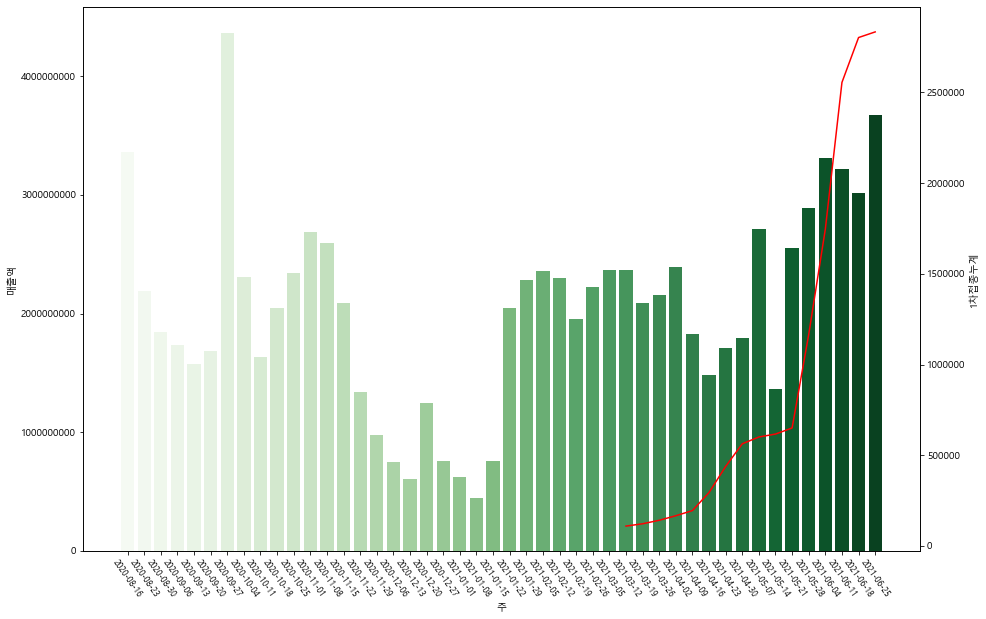

In [261]:
## seaborn 그래프 겹쳐서 그리기

x =  final_data['주']
y =  final_data['매출액']
y1 = final_data['1차접종누계']



fig, ax1 = plt.subplots() # initializes figure and plots

ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)

ax2 = ax1.twinx()
plt.gcf().set_size_inches(15, 10)

fig1 = sns.barplot(x = x, y = y, ax = ax1, palette = 'Greens') # plots the first set of data, and sets it to ax1. #
fig2 = sns.lineplot(x = x, y = y1, color = 'red', ax = ax2) # plots the second set, and sets to ax2. 


#plt.axhline(avg_movie['매출액'][0],0.05, 0.95, color = 'red', linestyle = '--' )

fig1.set_xticklabels(fig1.get_xticklabels(), rotation=-55, fontsize='small')


ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)


plt.show()

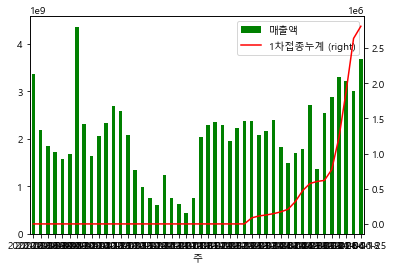

In [63]:

#plt.figure(figsize=(20, 20))

ax = final_data.plot(kind='bar', x='주', y='매출액', color='Green')
ax2 = final_data.plot(kind='line', y='1차접종누계', color='Red', secondary_y=True, ax=ax)
#plt.axhline(avg_movie['매출액'][0],0.05, 0.95, color = 'blue', linestyle = '--' )
#plt.xticks(rotation = - 45 )
#plt.axvline(30, 0.2, 0.8, color='lightgray', linestyle='--', linewidth=2)
# yaxvline(x값, y축 시작, y축 끝, #(y축은 0 ~ 1 사이의 소수갑으로 표현)
#plt.vlines(20, 500, 1500, color='red', linestyle='solid', linewidth=3)

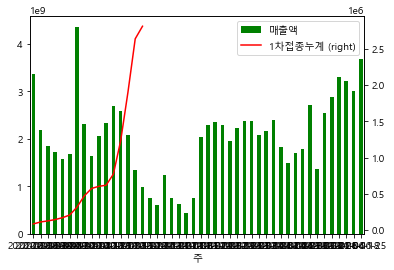

In [45]:

ax = tot_seoul_data.plot(kind='bar', x='주', y='매출액', color='Green')
ax2 = seoul_vaccine.plot(kind='line', y='1차접종누계', color='Red', secondary_y=True, ax=ax)

#plt.axhline(avg_movie['매출액'][0],0.05, 0.95, color = 'blue', linestyle = '--' )
#plt.xticks(rotation = - 45 )

In [46]:
seoul_vaccine

,1차접종누계,2차접종누계,주
0,85864,0,2021-03-12
1,112949,0,2021-03-19
2,127379,2171,2021-03-26
3,146106,9182,2021-04-02
4,171379,13153,2021-04-09
5,208744,13502,2021-04-16
6,317386,15901,2021-04-23
7,472376,31620,2021-04-30
8,574583,59707,2021-05-07
9,604185,125220,2021-05-14


In [47]:
tot_seoul_data

,지역,매출액,관객수,주
0,서울시,3361656490,368804,2020-08-16
1,서울시,2189550260,247399,2020-08-23
2,서울시,1842116650,200100,2020-08-30
3,서울시,1733144880,188395,2020-09-06
4,서울시,1571785690,172993,2020-09-13
5,서울시,1686750342,194747,2020-09-20
6,서울시,4365204790,464557,2020-09-27
7,서울시,2310220710,243950,2020-10-04
8,서울시,1635498260,175172,2020-10-11
9,서울시,2051049940,235614,2020-10-18


In [48]:
seoul_vaccine

,1차접종누계,2차접종누계,주
0,85864,0,2021-03-12
1,112949,0,2021-03-19
2,127379,2171,2021-03-26
3,146106,9182,2021-04-02
4,171379,13153,2021-04-09
5,208744,13502,2021-04-16
6,317386,15901,2021-04-23
7,472376,31620,2021-04-30
8,574583,59707,2021-05-07
9,604185,125220,2021-05-14


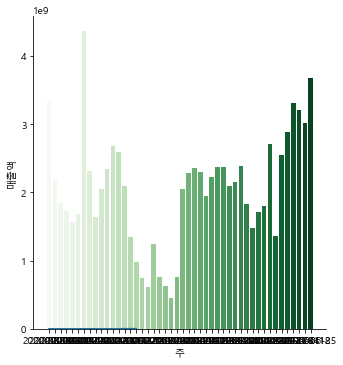

In [49]:


fig_movie = sns.catplot(data = tot_seoul_data, x='주', y='매출액', kind = 'bar', palette = 'Greens')
fig_vacc = sns.lineplot(data = seoul_vaccine, x='주', y='1차접종누계')
# fig_movie.fig.set_size_inches(15,10)
# plt.axhline(avg_movie['매출액'][0],0.05, 0.95, color = 'red', linestyle = '--' )
# plt.xticks(rotation = - 45 )

TypeError: 'FacetGrid' object is not callable

<Figure size 1080x576 with 0 Axes>

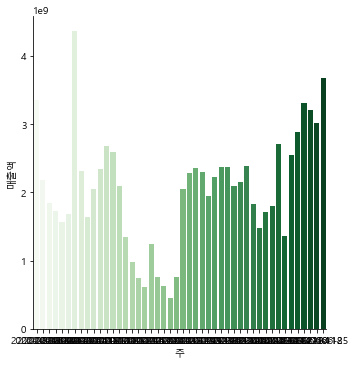

In [50]:
plt.gcf().set_size_inches(15, 8)
#fig, ax = plt.subplots(1,2,figsize = (10,5))
fig_movie = sns.catplot(data = tot_seoul_data, x='주', y='매출액', kind = 'bar', palette = 'Greens')
fig_vacc = fig_movie(data = seoul_vaccine, x='주', y='매출액', kind = 'bar')

fig_movie.fig.set_size_inches(15,10)
plt.axhline(avg_movie['매출액'][0],0.05, 0.95, color = 'red', linestyle = '--' )
plt.xticks(rotation = - 45 )
#sns.barplot(x="주", y="매출액", data=tot_data)

## 부산시 시각화 파일 합치기

In [ ]:
## 중복된 0312 데이터 삭제
busan_test_data_2021_av.drop([0], inplace=True)

In [ ]:
busan_test_data_2020.head()
busan_test_data_2021_bv.head()
busan_test_data_2021_av.head()

In [ ]:
## 불필요한 열 제거
busan_test_data_2020.drop('Unnamed: 0',axis=1, inplace=True)
busan_test_data_2021_bv.drop('Unnamed: 0',axis=1, inplace=True)
busan_test_data_2021_av.drop('Unnamed: 0',axis=1, inplace=True)

In [ ]:
busan_test_data_2020.head()
busan_test_data_2021_bv.head()
busan_test_data_2021_av.head()

In [ ]:
tot_busan_data = pd.concat([busan_test_data_2020, busan_test_data_2021_bv, busan_test_data_2021_av])

In [ ]:
tot_busan_data.head()
tot_busan_data.tail()

In [ ]:
plt.gcf().set_size_inches(15, 8)

fig = sns.catplot(data = tot_busan_data, x='주', y='매출액', kind = 'bar', palette = 'Greens')

fig.fig.set_size_inches(15,10)
plt.axhline(avg_movie['매출액'][0],0.05, 0.95, color = 'red', linestyle = '--' )
plt.xticks(rotation = - 45 )
#sns.barplot(x="주", y="매출액", data=tot_data)